In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.fft import fft, ifft, fftfreq, fftshift
%matplotlib widget

Util-функции

In [2]:
def draw_plots(rows, cols, width, height, subplot_data, legend_loc="best", legend_fontsize="small"):
    fig, axes = plt.subplots(rows, cols, figsize=(width, height))
    axes = axes.flatten() if rows * cols > 1 else [axes]

    flat_data = [item for row in subplot_data for item in row]

    for idx, data in enumerate(flat_data):
        if idx >= len(axes):
            raise ValueError(f"Too many subplots provided in 'subplot_data': expected at most {rows * cols}, got more.")
        if not data:
            continue

        ax = axes[idx]

        (
            x_arrays, y_arrays,
            labels,
            x_label, y_label,
            colors, linestyles,
            linewidth, markers,
            markersizes, title,
            markerevery
        ) = data + [None] * (12 - len(data))

        num_plots = len(y_arrays)

        for i in range(num_plots):
            x = x_arrays[i]
            y = y_arrays[i]

            label = labels[i] if labels and i < len(labels) else None
            color = colors[i] if colors and i < len(colors) else None
            linestyle = linestyles[i] if linestyles and i < len(linestyles) else '-'
            lw = linewidth[i] if linewidth and i < len(linewidth) else 2
            marker = markers[i] if markers and i < len(markers) else None
            markersize = markersizes[i] if markersizes and i < len(markersizes) else None
            mevery = markerevery[i] if markerevery and i < len(markerevery) else None

            ax.plot(x, y,
                    label=label,
                    color=color,
                    linestyle=linestyle,
                    linewidth=lw,
                    marker=marker,
                    markersize=markersize,
                    markevery=mevery)

        if labels:
            ax.legend(loc=legend_loc, fontsize=legend_fontsize)
        ax.grid(True)
        if x_label:
            ax.set_xlabel(x_label)
        if y_label:
            ax.set_ylabel(y_label)
        if title:
            ax.set_title(title)
    
    for idx in range(len(flat_data), len(axes)):
        fig.delaxes(axes[idx])
        
    plt.gca().set_axisbelow(True) 
    plt.tight_layout()
    plt.show()

In [3]:
g = lambda t: 17 if (1 <= t <= 8) else 0
u = lambda t, b, c, d: g(t) + b * np.random.uniform(-1, 1) + c * np.sin(d * t)

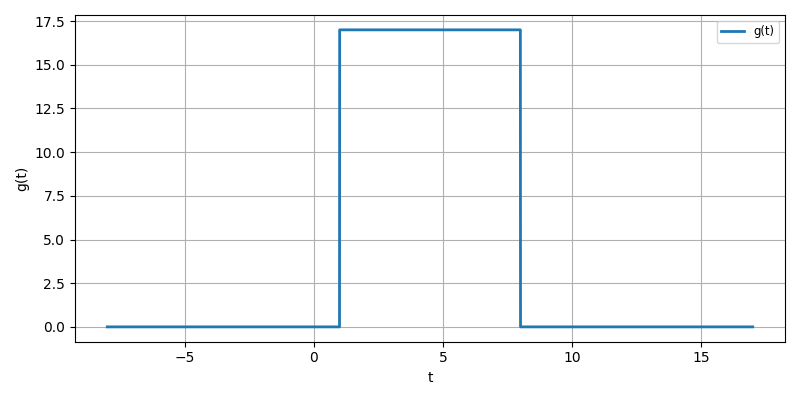

In [4]:
t_space_1 = np.linspace(-8, 17, 4048)
g_1 = [g(t) for t in t_space_1]

draw_plots(1, 1, 8, 4, [[[
    [t_space_1],
    [g_1],
    ['g(t)'],
    't', 'g(t)'
]]])

# Задание 1.1

In [5]:
c = 0
d = 1 # любое число, чтобы можно было вызвать функцию, не влияет на результат
b_array = (2, 5, 10)
nu_array = (0.45, 1.0, 2.0)

subplot_data = []

dt = t_space_1[1] - t_space_1[0]

N = 2 ** 14 
g_hat = fftshift(fft(g_1, n=N))
freqs = fftshift(fftfreq(N, d=dt))
subplot_data_Fourier_nu = []
subplot_data_signal = []

for b in b_array:
    ub = [u(t, b, c, d) for t in t_space_1]
    
    subplot_data.append([[
        [t_space_1],
        [ub],
        [f"b = {b}"],
        "t",
        "u(t)",
        ["green"],
        [None],
        [0.8]
    ]])

    ub_hat = fftshift(fft(ub, n=N))
    freq_mask = (np.abs(freqs) <= 3)
    subplot_data_Fourier_nu_b = []
    subplot_data_signal_b = []
    for nu in nu_array:
        ub_catted = np.where((freqs >= -nu) & (freqs <= nu), ub_hat, 0)
        subplot_data_Fourier_nu_b.append([
            [freqs[freq_mask]] * 3,
            [
            2.0 / N * np.abs(g_hat)[freq_mask],
            2.0 / N * abs(ub_hat)[freq_mask],
            2.0 / N * np.abs(ub_catted)[freq_mask]
            ],
            ["g^(v)", "u^(v)", "u^(v)[-v0;v0]"],
            "v",
            "f(v)",
            ["green", "red", "blue"] * 3,
            ["-", "-", "-"],
            [0.9] * 3,
            [None] * 3,
            [None] * 3,
            f"v0 = {nu}, b = {b}"
        ])
        ub_filtered = np.real(ifft(fftshift(ub_catted)))[:len(t_space_1)]
        subplot_data_signal_b.append([
            [t_space_1] * 3,
            [ub, g_1, ub_filtered],
            ["u(t)", "g(t)", f"u_filtered(t), v0={nu}"],
            "t",
            "Signal(t)",
            ["green", "red", "blue"],
            ["-", "-", "-"],
            [1.5] * 3,
            [None] * 3,
            [None] * 3,
            f"b = {b}, v0 = {nu}"
        ])

    subplot_data_Fourier_nu.append(subplot_data_Fourier_nu_b)
    subplot_data_signal.append(subplot_data_signal_b)

#### Нарисуем графики

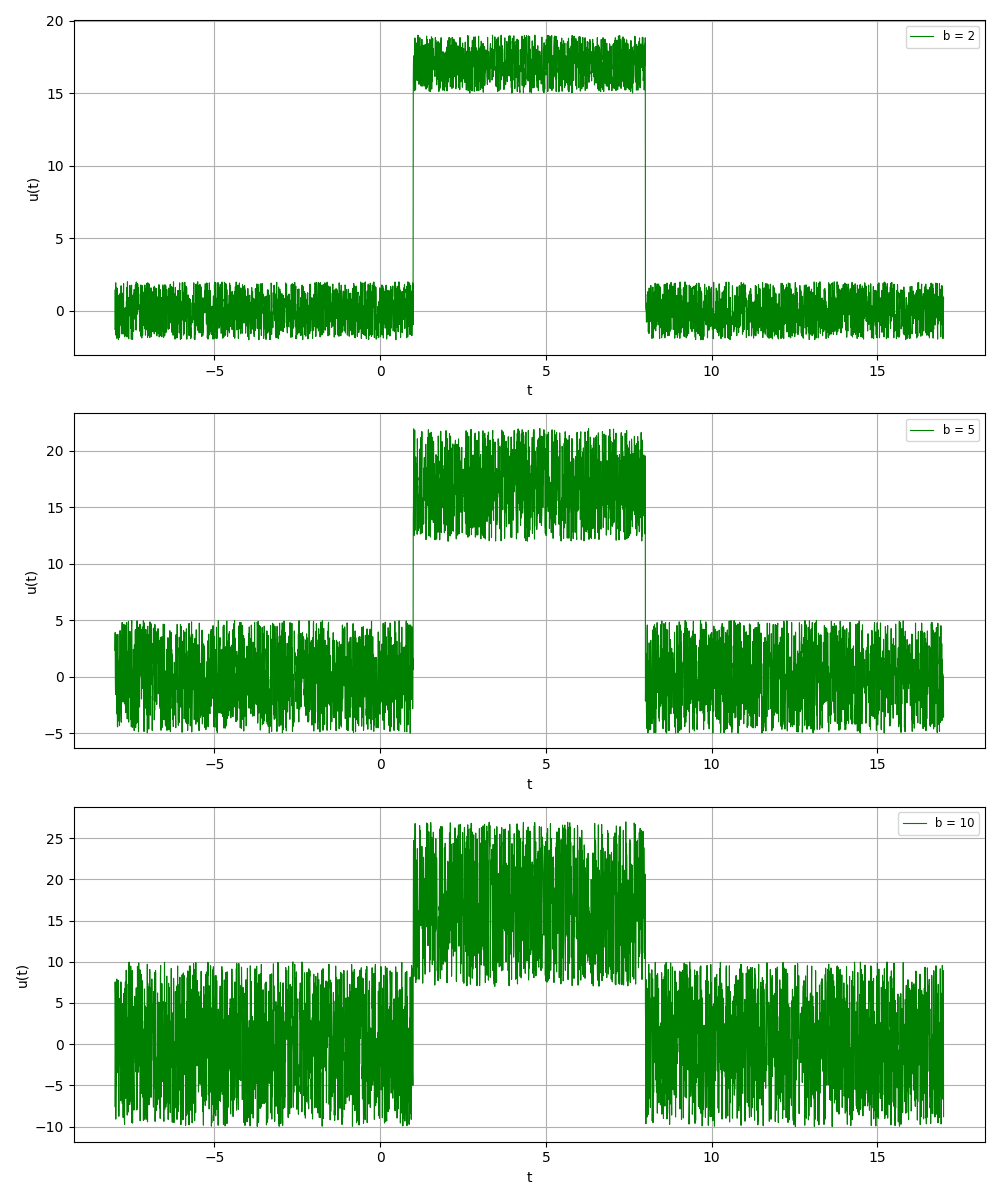

In [6]:
draw_plots(
    rows=3,
    cols=1,
    width=10,
    height=12,
    subplot_data=subplot_data
)

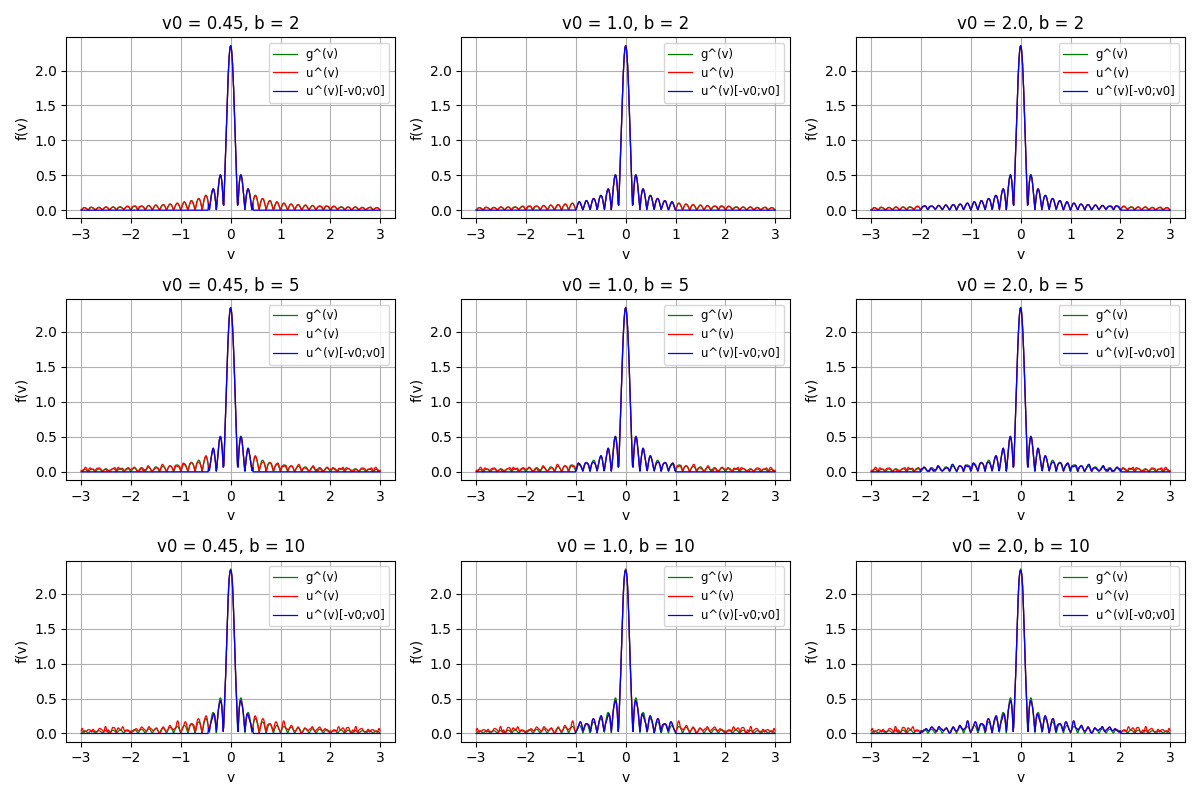

In [7]:
draw_plots(
    rows=3,
    cols=3,
    width=12,
    height=8,
    subplot_data=subplot_data_Fourier_nu
)

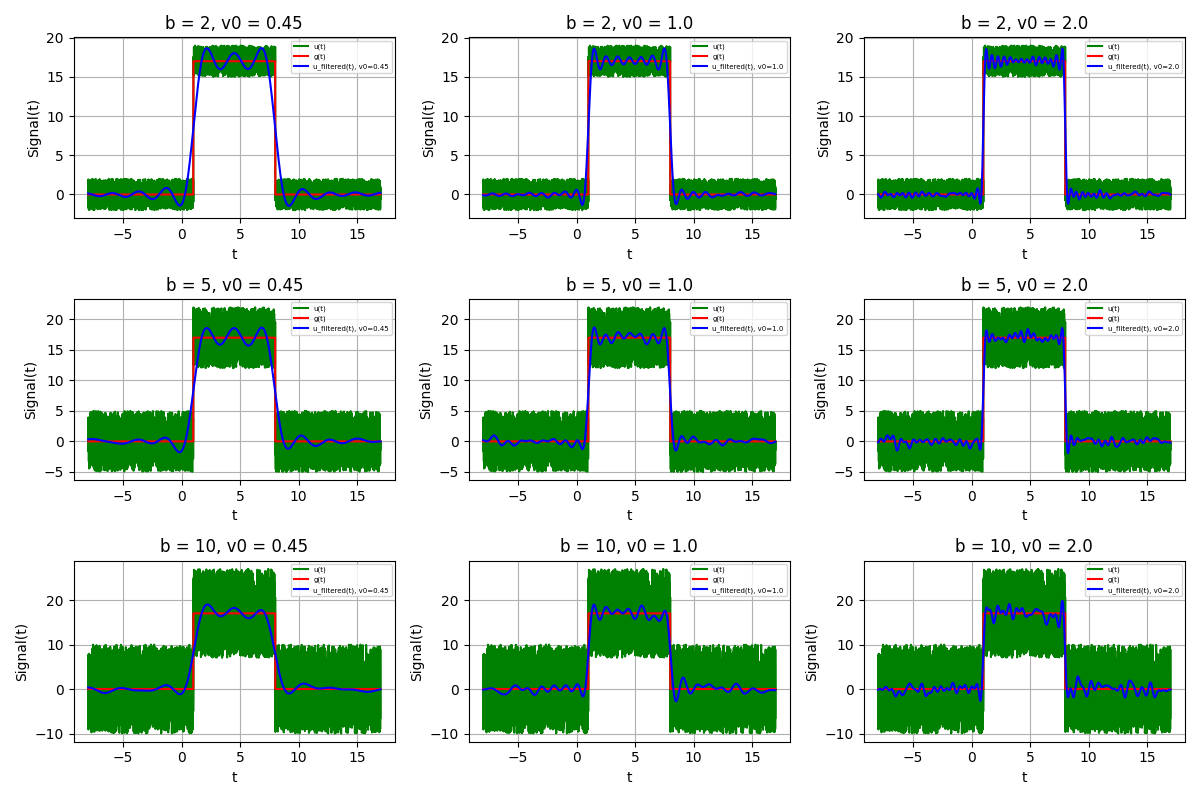

In [8]:
draw_plots(
    rows=3,
    cols=3,
    width=12,
    height=8,
    subplot_data=subplot_data_signal,
    legend_loc="upper right",
    legend_fontsize=5
)

# Задание 1.2

In [9]:
b_values = [2, 8]
c_values = [1, 3, 6]
d_values = [1, 3, 6]
nu_range = 3

N = 2 ** 14
dt = t_space_1[1] - t_space_1[0]
freqs = fftshift(fftfreq(N, d=dt))

subplot_data_signal_12 = []
subplot_data_fourier_12 = []

for b in b_values:
    for c in c_values:
        subplot_data_signal_12_c = []
        subplot_data_fourier_12_c = []
        for d in d_values:
            u_signal = [u(t, b, c, d) for t in t_space_1]
            u_hat = fftshift(fft(u_signal, n=N))

            harmonic_mask = (np.abs(freqs - d/2/np.pi) > 0.05) & (np.abs(freqs + d/2/np.pi) > 0.05)
            lowpass_mask = (np.abs(freqs) <= nu_range)
            combined_mask = lowpass_mask & harmonic_mask

            u_hat_filtered = np.where(combined_mask, u_hat, 0)
            u_filtered = np.real(ifft(fftshift(u_hat_filtered)))[:len(t_space_1)]

            freq_mask = np.abs(freqs) <= 3
            subplot_data_fourier_12_c.append([
                [freqs[freq_mask]] * 3,
                [
                    2.0 / N * np.abs(g_hat)[freq_mask],
                    2.0 / N * np.abs(u_hat)[freq_mask],
                    2.0 / N * np.abs(u_hat_filtered)[freq_mask]
                ],
                ["g^(v)", "u^(v)", "u_filtered^(v)"],
                "v",
                "f(v)",
                ["green", "red", "blue"],
                ["-", "-", "-"],
                [1.0] * 3,
                [None] * 3,
                [None] * 3,
                f"b={b}, c={c}, d={d}"
            ])

            subplot_data_signal_12_c.append([
                [t_space_1] * 3,
                [u_signal, g_1, u_filtered],
                ["u(t)", "g(t)", "u_filtered(t)"],
                "t",
                "Signal",
                ["green", "red", "blue"],
                ["-", "-", "-"],
                [1.5] * 3,
                [None] * 3,
                [None] * 3,
                f"b={b}, c={c}, d={d}"
            ])

        subplot_data_signal_12.append(subplot_data_signal_12_c)
        subplot_data_fourier_12.append(subplot_data_fourier_12_c)


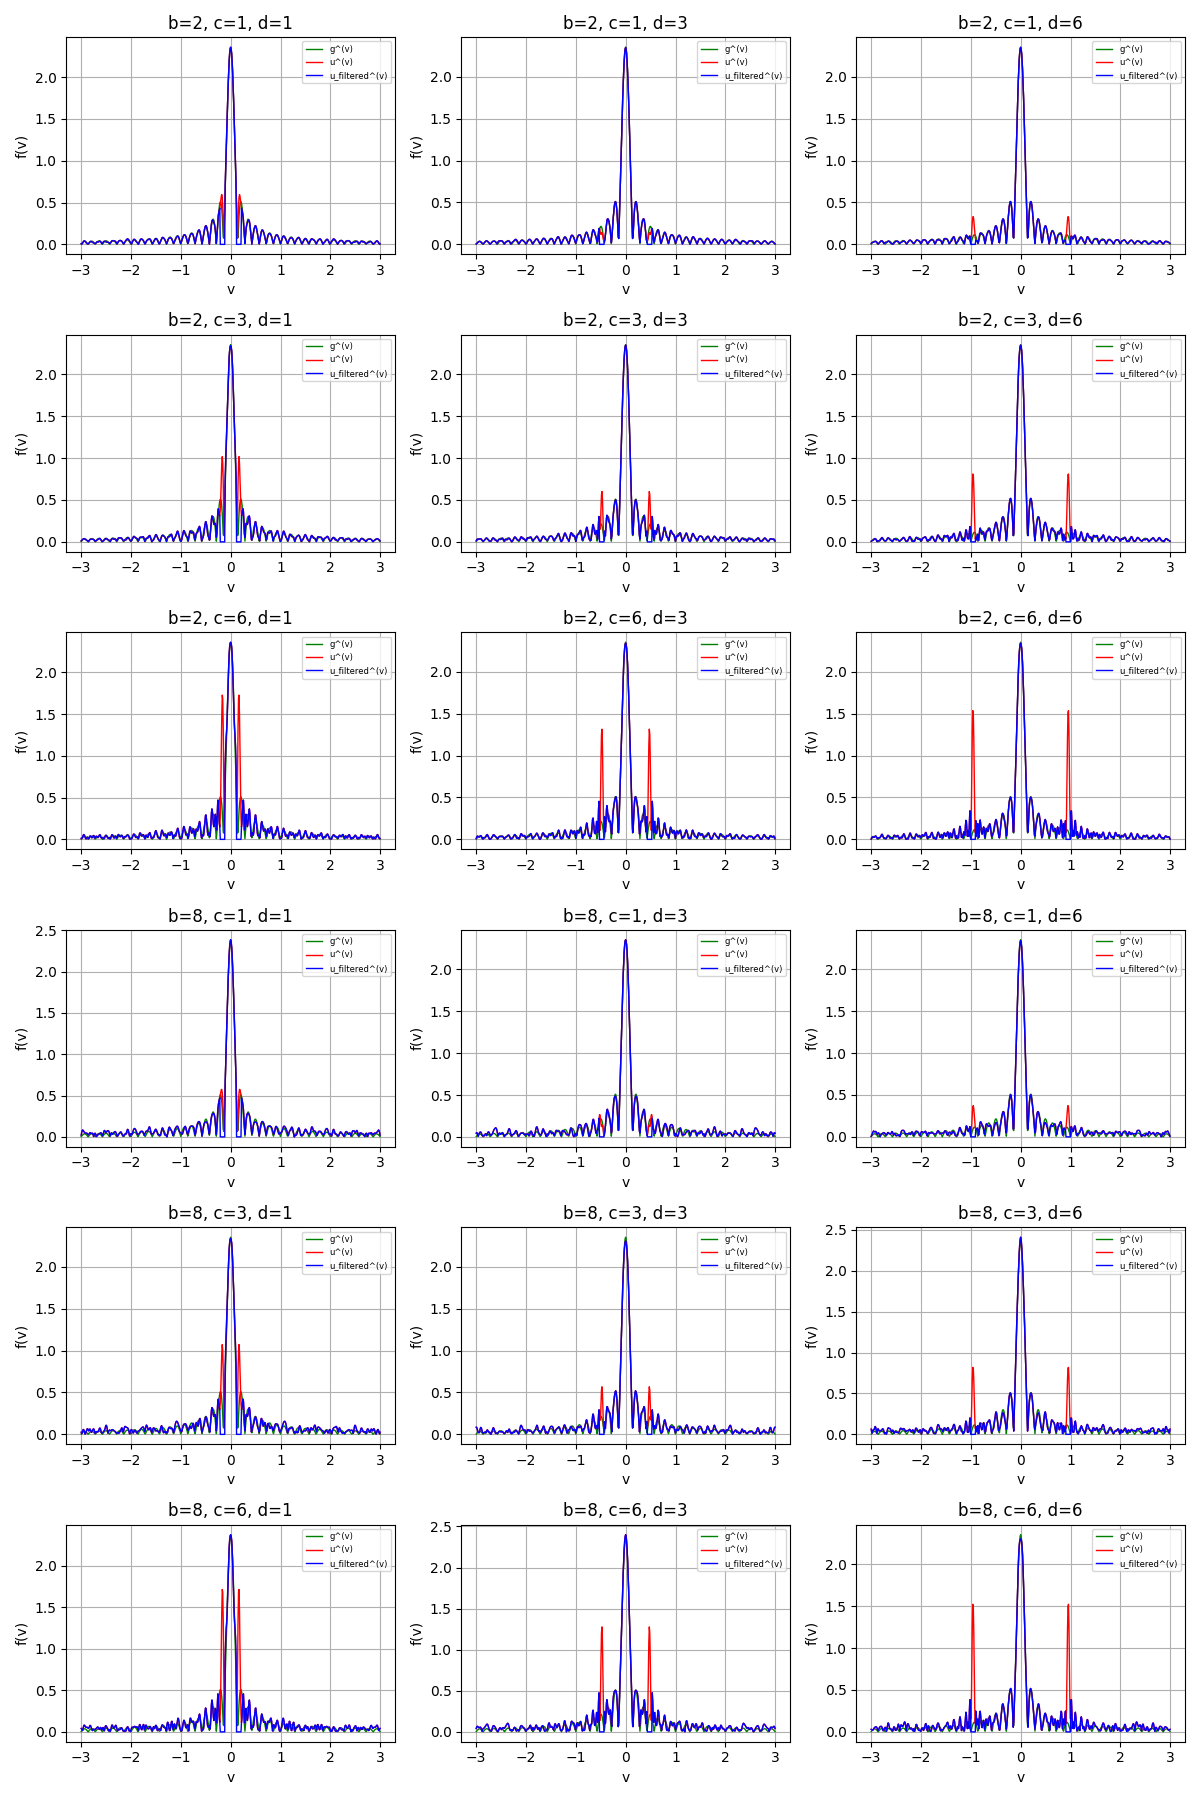

In [10]:
draw_plots(
    rows=6,
    cols=3,
    width=12,
    height=18,
    subplot_data=subplot_data_fourier_12,
    legend_loc="upper right",
    legend_fontsize=6
)

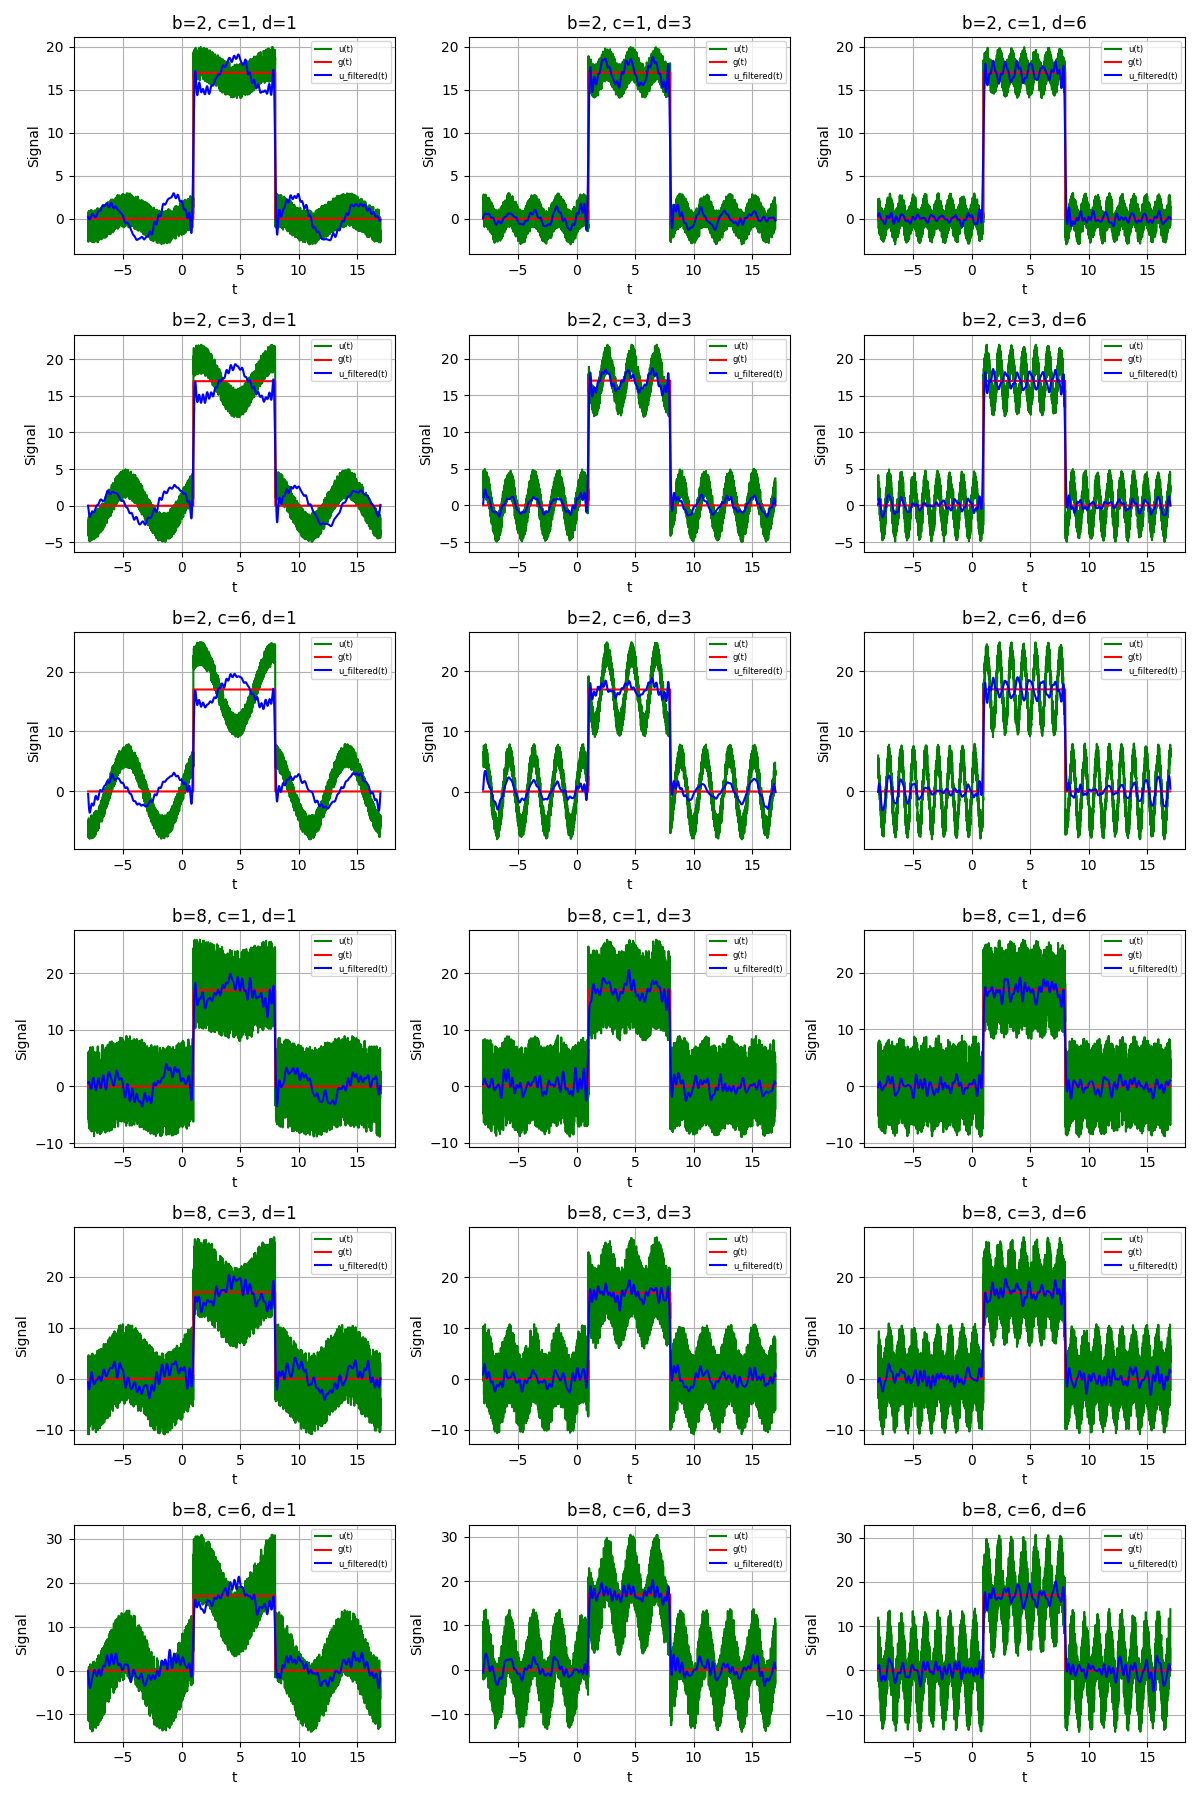

In [11]:
draw_plots(
    rows=6,
    cols=3,
    width=12,
    height=18,
    subplot_data=subplot_data_signal_12,
    legend_loc="upper right",
    legend_fontsize=6
)